# Pharmacokinetic parameters
Pharmacokinetic parameters are numerical values that describe how a drug behaves in the body. They play a vital role in determining the dosage and frequency of drug administration. Here's a summary of some of the key parameters:

1. **Absorption**: This parameter involves how the drug is absorbed into the bloodstream from the site of administration. The rate and extent of absorption can influence the onset, intensity, and duration of a drug's effect.

2. **Distribution**: This refers to how the drug spreads throughout the body. The volume of distribution (Vd) is a key parameter that quantifies the extent to which a drug is distributed in the body's tissues compared to its concentration in the blood.

3. **Metabolism (Biotransformation)**: Metabolism is how the drug is chemically modified or broken down in the body, primarily by liver enzymes. This can change the drug's activity and affects how quickly it's cleared from the body.

4. **Elimination (Excretion)**: This parameter refers to the removal of the drug from the body, primarily through the kidneys (urine) or liver (bile). The rate of elimination is usually expressed as the drug's half-life (t1/2), which is the time it takes for the concentration of the drug in the body to be reduced by half.

5. **Clearance (Cl)**: This is a measure of the body's efficiency in eliminating the drug, expressed as volume/time (like mL/min). It's a crucial parameter that determines the steady-state concentration of the drug for a given dosage regimen.

6. **Bioavailability (F)**: This is the fraction of the administered dose of a drug that reaches the systemic circulation in an unchanged form. It's a crucial parameter, especially for oral medications.

7. **Area Under the Curve (AUC)**: This is a measure of the total exposure of the body to the drug. It's calculated as the integral of the concentration-time curve, from administration to elimination.

8. **Peak Concentration (Cmax) and Time to Reach Peak Concentration (Tmax)**: Cmax is the highest concentration a drug achieves in the body after administration, and Tmax is the time it takes to reach this peak concentration.

These pharmacokinetic parameters are essential in understanding a drug's behavior and in designing optimal drug dosing regimens. By understanding these parameters, healthcare professionals can better predict how a drug will behave, enabling them to administer the drug safely and effectively.

# Algebraic equation
We calculate the pharmacokinetic parameters based on simple algebraic equation for oral absorption:

\begin{equation}
C(t) = \frac{Dose}{V} \cdot t \cdot e^{-\frac{CL}{V}\cdot t}
\end{equation}

This model states the relationship between the independent variable, `time (t)`, and the dependent variable, concentration (`C`). The notation `C(t)` suggests that `C` depends on `t`. Dose, clearance (CL), and distribution volume (V) are param- eters (constants); they do not change with different values of t. 


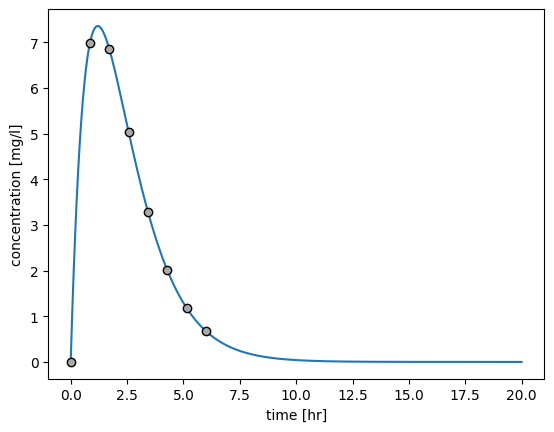

In [4]:
import numpy as np
from matplotlib import pyplot as plt

t = np.linspace(0, 20, num=300) # [hr]
t_points = np.linspace(0, 6, num=8)
Dose = 100  # [mg]
V = 6.0  # [l] 
CL = 5.0  # [L/hr]
C = Dose/V * t * np.exp(-CL/V*t)  # [mg/l]
C_points = Dose/V * t_points * np.exp(-CL/V*t_points)

f, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(t, C)
ax.plot(t_points, C_points, linestyle="None", marker="o", markeredgecolor="black", color="darkgrey")
ax.set_xlabel("time [hr]")
ax.set_ylabel("concentration [mg/l]")
plt.show()

## Pharmacokinetic parameters

Based on the example curve we now calculate typical pharmacokinetic parameters of the curve.

In [28]:
# overview of the measurement data
import pandas as pd
t_unit = "hr"
c_unit = "mg/l"
df = pd.DataFrame({
    "t": t_points, 
    "c": C_points,
})
print(df)

          t         c
0  0.000000  0.000000
1  0.857143  6.993452
2  1.714286  6.847172
3  2.571429  5.027964
4  3.428571  3.281864
5  4.285714  2.008261
6  5.142857  1.179753
7  6.000000  0.673795


### AUC (area under the curve)
The AUC, or Area Under the Curve, is another important pharmacokinetic parameter.

In the context of pharmacokinetics, the "curve" in question is a graph of drug concentration in the bloodstream over time. The AUC is essentially the area under this graph, representing the total exposure of the body to the drug.

AUC is used to quantify the extent of drug absorption. When a drug is administered, it gets absorbed into the bloodstream and then gradually eliminated. A plot of the drug concentration in the blood over time typically forms a curve. The AUC of this curve from the time of administration to a specific time point (say, 24 hours) provides an estimate of the total drug exposure during this period. The AUC from time zero to infinity (AUC0–∞) is often used to estimate the total drug exposure over an infinite period.

AUC is directly proportional to the total amount of unchanged drug that reaches systemic circulation. Therefore, it's a valuable indicator of bioavailability (the extent and rate at which the drug is absorbed and becomes available at the site of action). It's also used to calculate other pharmacokinetic parameters, such as the clearance rate (how quickly the drug is eliminated from the body).

Moreover, AUC is often used in dose-response studies, where it helps in identifying the appropriate dosage for a therapeutic effect, and in comparative bioavailability studies, where it is used to compare the bioavailability of two different pharmaceutical products, such as a brand name drug and its generic version.

In [29]:
def f_auc(t: np.ndarray, c: np.ndarray, rm_nan: bool = True):
    """Calculate the area under the curve (AUC) via trapezoid rule.

    :param t = time array
    :param c = concentration array
    :param rm_nan = remove nan values array
    """
    if rm_nan:
        idx = np.where(~np.isnan(c))
        t, c = t[idx], c[idx]
    auc = np.sum((t[1:] - t[0:-1]) * (c[1:] + c[0:-1]) / 2.0)
    return auc

auc = f_auc(t=df.t.values, c=df.c.values)
print(f"AUC: {auc:.2f} [{c_unit}*{t_unit}]")

AUC: 22.01 [mg/l*hr]


### Time to maximum (tmax) and maximum concentration (cmax)

1. **Tmax (Time of maximum concentration):** This parameter represents the time it takes for a drug to reach its maximum concentration (Cmax) in the bloodstream after administration. It can provide insight into the rate of absorption of the drug. For example, a shorter Tmax could suggest faster absorption. However, many factors can affect Tmax, including the route of administration, the drug's formulation, and individual physiological differences.

2. **Cmax (Maximum or peak concentration):** This parameter refers to the highest concentration that a drug achieves in the body after administration, and before elimination processes reduce it. Cmax is a crucial factor in determining the efficacy and potential toxicity of a drug. This parameter can be influenced by factors such as the dose, rate of administration, and rate of absorption and elimination.

![Cmax and tmax](07_pharmacokinetic_parameters_cmax.png)

In [30]:
def f_max(t, c):
    """Return timepoint of maximal value and maximal value based on curve.

    The tmax depends on the value of both the absorption rate constant (ka)
    and the elimination rate constant (kel).

    :return: tuple (tmax, cmax)
    """
    idx = np.nanargmax(c)
    return t[idx], c[idx]


tmax, cmax = f_max(t=df.t.values, c=df.c.values)
print(f"tmax: {tmax:.2f} [{t_unit}]")
print(f"cmax: {cmax:.2f} [{c_unit}]")

tmax: 0.86 [hr]
cmax: 6.99 [mg/l]


# Elimination rate kel, Half-life thalf and AUCinf

The elimination rate constant (Kel) and half-life (T1/2) are critical pharmacokinetic parameters that describe how a drug is eliminated from the body.

1. **Elimination Rate Constant (Kel):** This parameter describes the rate at which a drug is removed from the body. It's usually expressed in units of time^-1 (such as hours^-1). Kel is calculated using the formula Kel = ln(2) / T1/2. A larger Kel means the drug is eliminated more rapidly.

2. **Half-Life (T1/2):** This is the time it takes for the concentration of the drug in the body (or in blood plasma) to reduce by half. It's a measure of how quickly the drug is being eliminated from the body. The half-life is calculated using the formula T1/2 = ln(2) / Kel. Drugs with shorter half-lives are eliminated from the body more quickly than those with longer half-lives. This parameter is particularly important when determining dosing intervals for a medication.

These two parameters provide vital information about how long a drug will remain in the body, which can guide decisions about the frequency and timing of doses to maintain the drug concentration within a therapeutic range. They can also help predict the time it will take to eliminate a drug from the body completely, which can be especially important in situations where a patient experiences toxic effects from a medication or needs to switch to a different drug.

For the calculation of kel, thalf and auc_inf we have to perform a linear regression on the log pharmacokinetic timecourse.

In [34]:
from scipy import stats

def f_ols_regression(t, c):
    """Linear regression on the log timecourse after maximal value.

    The linear regression is calculated from all data points after the maximum.

    :return:
    """

    # linear regression start regression on data point after maximum
    max_index = np.nanargmax(c)
    x = t[max_index + 1 :]
    y = np.log(c[max_index + 1 :])

    # using mask to remove nan values
    mask = ~np.isnan(x) & ~np.isnan(y)
    slope, intercept, r_value, p_value, std_err = stats.linregress(x[mask], y[mask])

    return [slope, intercept]

[slope, intercept] = f_ols_regression(df.t.values, df.c.values)

print(f"slope: {slope:.2f} [{c_unit}/{t_unit}/]")
print(f"intercept: {cmax:.2f} [{c_unit}]")

slope: -0.55 [mg/l/hr/]
cmax: 6.99 [mg/l]


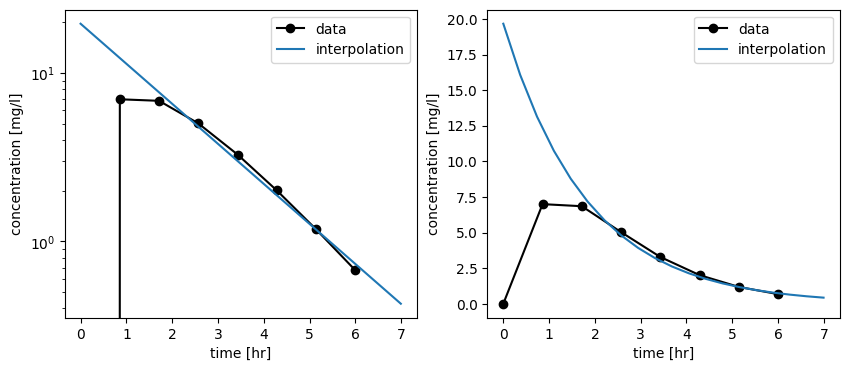

In [42]:
# plot the interpolation results
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

tvec = np.linspace(0, df.c.max(), num=20)
for ax in (ax1, ax2):
    ax.plot(df.t, df.c, "-o", color="black", label="data")
    ax.plot(tvec, np.exp(intercept + slope*tvec), label="interpolation")

    ax.set_xlabel("time [hr]")
    ax.set_ylabel("concentration [mg/l]")
    ax.legend()

ax1.set_yscale("log")
plt.show()

Based on the interpolation results we can calculate kel, thalf and aucinf.

In [45]:
[slope, intercept] = f_ols_regression(df.t.values, df.c.values)
kel = -slope
print(f"kel: {kel:.2f} [{1}/{t_unit}]")

thalf = np.log(2) / kel
print(f"thalf: {thalf:.2f} [{t_unit}]")

# by integrating from tend to infinity for c[-1]exp(slope * t) we get
auc = f_auc(df.t.values, df.c.values)
auc_d = -df.c.values[-1] / slope
auc_inf = auc + auc_d
print(f"AUC: {auc:.2f} [{c_unit}*{t_unit}]")
print(f"AUCinf: {auc_inf:.2f} [{c_unit}*{t_unit}]")     

kel: 0.55 [1/hr]
thalf: 1.27 [hr]
AUC: 22.01 [mg/l*hr]
AUCinf: 23.24 [mg/l*hr]


### Volume of distribution (Vd) and Clearance (CL)